In [1]:
from cortix.src.port import Port
from cortix.src.module import Module
from cortix.src.cortix_main import Cortix
from cortix.util.dataplot import DataPlot

# Import the example fluid flow models
from cortix.examples.fluidflow.vortex import Vortex
from cortix.examples.fluidflow.droplet import Droplet

In [2]:
# Init the Cortix object
c = Cortix(use_mpi=False)

# Initialize and add the Vortex module to Cortix
v = Vortex()
c.add_module(v)

2019-06-19 12:40:55,205 - cortix - INFO - Created Cortix object


In [3]:
# Construct 5 droplets
num_drops = 5

for i in range(num_drops):
    droplet = Droplet()
    
    data_plot = DataPlot()
    data_plot.title = "Droplet Position Over Time"

    # Initialize the ports
    drop_port = Port("plot-data")
    plot_port = Port("plot-data-{}".format(i))
    vortex_velocity_port = Port("velocity")
    velocity_port = Port("velocity-{}".format(i))
    
    # Connect the ports
    drop_port.connect(plot_port)
    velocity_port.connect(vortex_velocity_port)

    # Add the ports to module
    data_plot.add_port(plot_port)
    droplet.add_port(drop_port)
    droplet.add_port(vortex_velocity_port)
    v.add_port(velocity_port)

    # Add the modules to Cortix
    c.add_module(droplet)
    c.add_module(data_plot)

In [6]:
# Run the simulation!
c.run()

2019-06-19 12:42:38,178 - cortix - INFO - Launching Module <cortix.examples.fluidflow.vortex.Vortex object at 0x7fb14f3be4a8>
2019-06-19 12:42:38,185 - cortix - INFO - Launching Module <cortix.examples.fluidflow.droplet.Droplet object at 0x7fb13f326be0>
2019-06-19 12:42:38,193 - cortix - INFO - Launching Module <cortix.util.dataplot.DataPlot object at 0x7fb17ebaecc0>
2019-06-19 12:42:38,202 - cortix - INFO - Launching Module <cortix.examples.fluidflow.droplet.Droplet object at 0x7fb13ebb3b70>
2019-06-19 12:42:38,210 - cortix - INFO - Launching Module <cortix.util.dataplot.DataPlot object at 0x7fb13ebb3c88>
2019-06-19 12:42:38,218 - cortix - INFO - Launching Module <cortix.examples.fluidflow.droplet.Droplet object at 0x7fb13ebbca58>
2019-06-19 12:42:38,226 - cortix - INFO - Launching Module <cortix.util.dataplot.DataPlot object at 0x7fb13ebb3f60>
2019-06-19 12:42:38,231 - cortix - INFO - Launching Module <cortix.examples.fluidflow.droplet.Droplet object at 0x7fb13ebc3748>
2019-06-19 12:

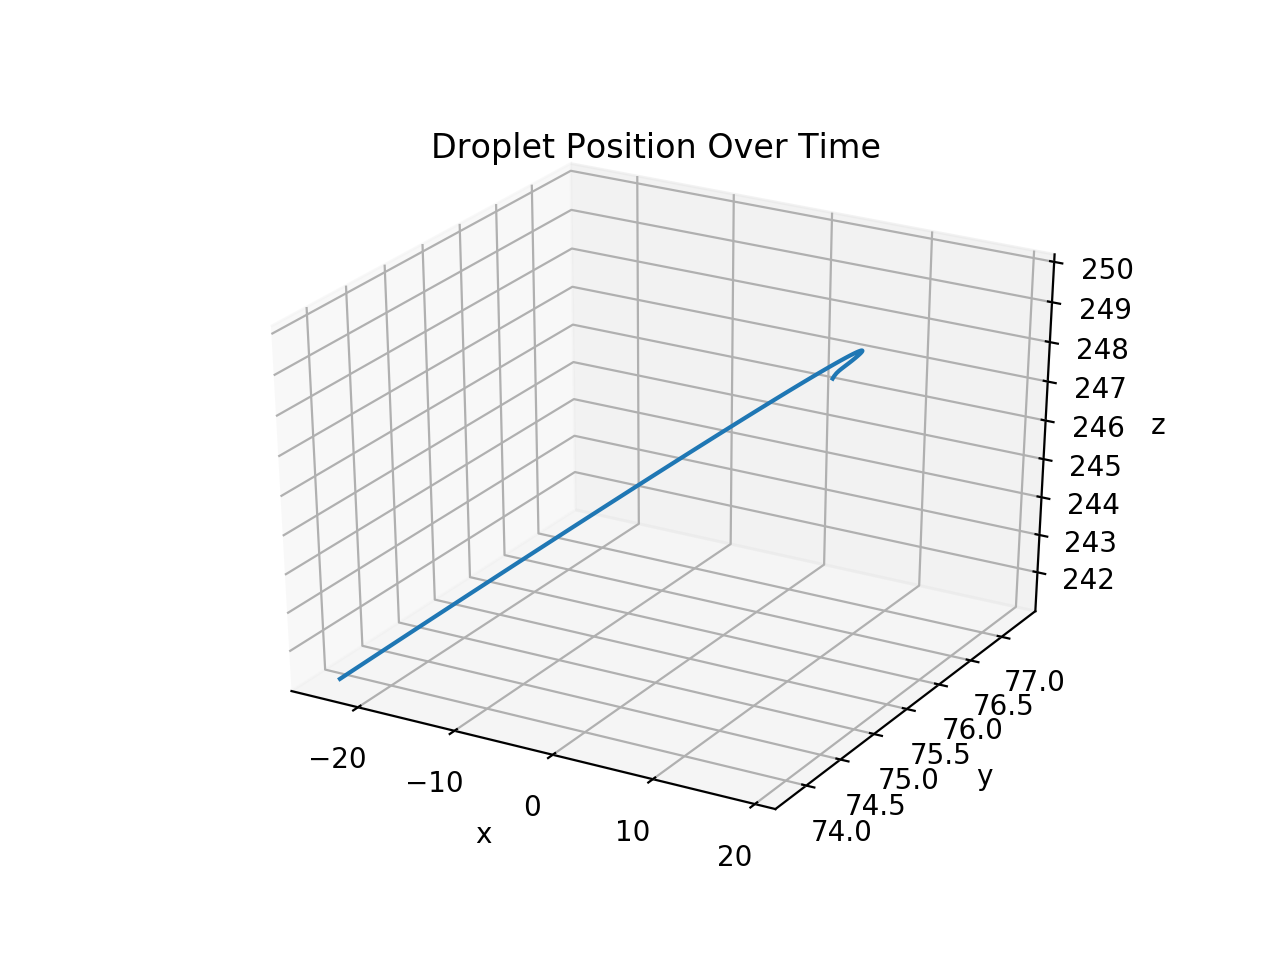

In [7]:
# View a random droplet
from random import randint
from IPython.display import Image, display
rand_img = "plot-data-{}.png".format(randint(0, num_drops))
display(Image(filename=rand_img))